In [49]:
import axelrod as axl
import numpy as np
import matplotlib.pyplot as plt

class Agent():  # 当前行动 self.action;当前收益 self.reward;累积收益cul_reward;
    # 历史收益reward——history；历史行动 his_action
    # q表；历史q表q0_his;q1_his

    def __init__(self, learning_rate,i, **kwargs):
        self.learning_rate = learning_rate
        self.action_space = [0, 1]
        self.q = np.array([0.2, 0.2])
        self.idx=i
        self.action = np.random.randint(0,2)
        self.reward = 0
        self.cul_reward=0.01
       
        self.reward_history = []
        self.action_history = []

        self.policy = kwargs['policy']
        self.epsilon = kwargs['epsilon'] if self.policy == 'e_greedy' else 0
        self.q0_his = [0.2,]  # 初始值也可以设为0，但是设为0，可能曲线会上升的很慢，最初100论，合作比例不高
        self.q1_his = [0.2,]

    def choose_action(self):
        if self.policy == 'e_greedy':
            if np.random.rand() < self.epsilon or ((self.q == 0).any()):

                action = np.random.choice(self.action_space)
            else:
                if abs(self.q[0]-self.q[1])<1e-7:
                     action = np.random.choice(self.action_space)
                else:
                    action = np.argmax(self.q)

#         print(action)
        self.action = action
        
        return action

    def RL(self):
        self.action_history.append(self.action)
        self.reward_history.append(self.reward)
        self.cul_reward+=self.reward
        self.q[self.action] += self.learning_rate * (self.reward - self.q[self.action])
        self.q[self.action]=round(self.q[self.action],6)
        self.q0_his.append(self.q[0])
        self.q1_his.append(self.q[1])
        #self.round=0

    def reset(self):
        self.q = np.array([0.2, 0.2])
        self.action = np.random.randint(0,2)
        self.reward = 0
        self.cul_reward=0.01
        self.reward_history = []
        self.action_history = []

from axelrod.action import Action
from axelrod.player import Player

C = Action.C
D = Action.D

longEDM_array = []
shortEDM_array = []

# 将经验决策方法改写成可以参加Axelrod锦标赛的策略
class long_EDM(Player):
    
    name = "long_EDM"
    
    classifier = {
        "memory_depth": 0,  # Memory-one Four-Vector = (p, p, p, p)
        "stochastic": True,
        "long_run_time": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self):
        super().__init__()
        self.agent = Agent(learning_rate=0.2, i=1, policy='e_greedy', epsilon=0.04)

    def strategy(self, opponent: Player):
        action = self.agent.choose_action()
        longEDM_array.append(action)
        self.agent.RL()
        return C if action == 0 else D
    
# 将经验决策方法改写成可以参加Axelrod锦标赛的策略
class short_EDM(Player):
    
    name = "short_EDM"
    
    classifier = {
        "memory_depth": 0,  # Memory-one Four-Vector = (p, p, p, p)
        "stochastic": True,
        "long_run_time": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self):
        super().__init__()
        self.agent = Agent(learning_rate=0.8, i=1, policy='e_greedy', epsilon=0.04)

    def strategy(self, opponent: Player):
        action = self.agent.choose_action()
        shortEDM_array.append(action)
        self.agent.RL()
        return C if action == 0 else D

    
strategies = [
    axl.TitForTat(), 
    axl.Defector(), 
    axl.Bully(), 
    axl.WinStayLoseShift(), 
    axl.SuspiciousTitForTat(), 
    axl.Grumpy(), 
    axl.CyclerDC(), 
    axl.ZDExtortion(), 
    axl.Alternator(), 
    axl.WinShiftLoseStay(), 
    axl.Cooperator(), 
    axl.AntiTitForTat()
]
strategies.append(long_EDM())
strategies.append(short_EDM())


In [77]:
longEDM_array = []
shortEDM_array = []

avglongEDM_array = []
avgshortEDM_array = []
tournament = axl.Tournament(strategies, turns=200, repetitions=1)
results = tournament.play()

# 计算每隔15个数字的平均值并存储到新数组中
for i in range(0, len(longEDM_array), 15):
    chunk = longEDM_array[i:i+15]  # 获取每隔15个数字的子数组    
    avg = round(np.mean(chunk), 3)  # 计算子数组的平均值并保留三位小数    
    avglongEDM_array.append(avg) 
    
    chunk2 = shortEDM_array[i:i+15]
    avg2 = round(np.mean(chunk2), 3)
    avgshortEDM_array.append(avg2)
print(len(avglongEDM_array))

Analysing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 138.77it/s]

200


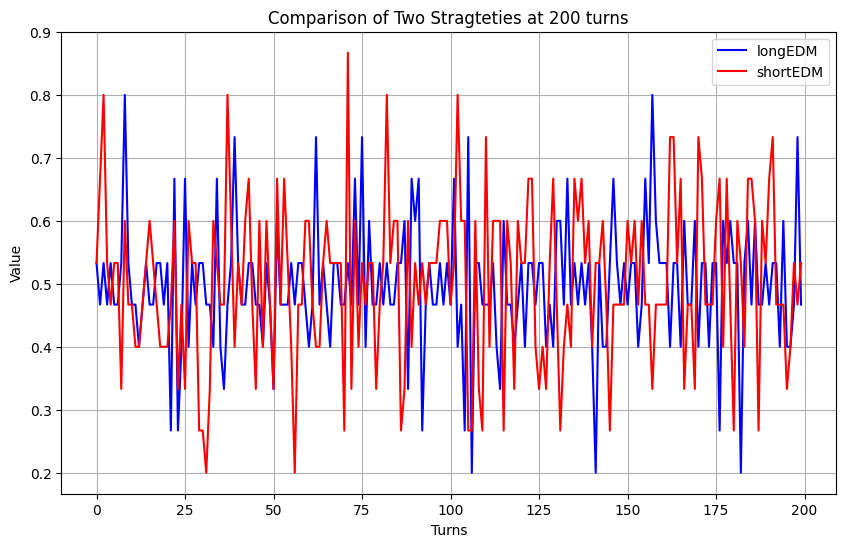

In [78]:
# 假设这是你的两个数组
array1 = avglongEDM_array  # 生成一个包含200个随机数的数组
array2 = avgshortEDM_array  # 同上

# 绘制曲线图
plt.figure(figsize=(10, 6))  # 设置图形的显示大小
plt.plot(array1, label='longEDM', color='blue', linestyle='-', marker='')  # 绘制第一个数组的曲线
plt.plot(array2, label='shortEDM', color='red', linestyle='-', marker='')   # 绘制第二个数组的曲线

# 添加一些图形属性来增强图形的可读性
plt.title('Comparison of Two Stragteties at 200 turns')  # 图形标题
plt.xlabel('Turns')  # x轴标签
plt.ylabel('Value')  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格线

# 显示图形
plt.show()


In [79]:
longEDM_array = []
shortEDM_array = []
avglongEDM2_array = []
avgshortEDM2_array = []

tournament = axl.Tournament(strategies, turns=500, repetitions=1)
results = tournament.play()

# 计算每隔15个数字的平均值并存储到新数组中
for i in range(0, len(longEDM_array), 15):
    chunk = longEDM_array[i:i+15]  # 获取每隔15个数字的子数组    
    avg = round(np.mean(chunk), 3)  # 计算子数组的平均值并保留三位小数    
    avglongEDM2_array.append(avg) 
    
    chunk2 = shortEDM_array[i:i+15]
    avg2 = round(np.mean(chunk2), 3)
    avgshortEDM2_array.append(avg2)
print(len(avgshortEDM2_array))    

Analysing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 167.70it/s]

500


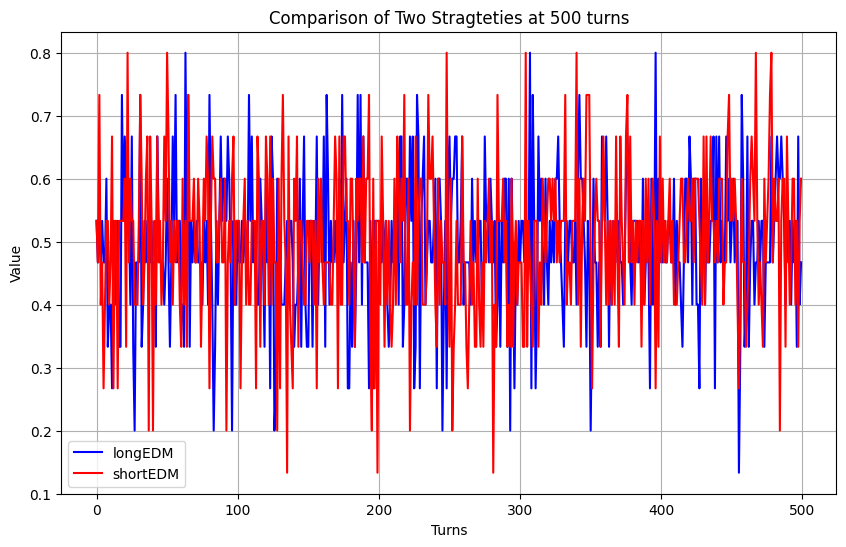

In [80]:
# 假设这是你的两个数组
array1 = avglongEDM2_array  # 生成一个包含200个随机数的数组
array2 = avgshortEDM2_array  # 同上

# 绘制曲线图
plt.figure(figsize=(10, 6))  # 设置图形的显示大小
plt.plot(array1, label='longEDM', color='blue', linestyle='-', marker='')  # 绘制第一个数组的曲线
plt.plot(array2, label='shortEDM', color='red', linestyle='-', marker='')   # 绘制第二个数组的曲线

# 添加一些图形属性来增强图形的可读性
plt.title('Comparison of Two Stragteties at 500 turns')  # 图形标题
plt.xlabel('Turns')  # x轴标签
plt.ylabel('Value')  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格线

# 显示图形
plt.show()